In [1]:
import joblib
import xgboost
from src.preprocessing import get_preprocessed_data

In [2]:
model = joblib.load(r"../models/black_box_xgboost.pkl")
df, _, _, true_labels, _ = get_preprocessed_data()
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086236 entries, 0 to 1086235
Data columns (total 100 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   issue_d                                    1086236 non-null  int64  
 1   loan duration                              1086236 non-null  int64  
 2   annual_inc                                 1086236 non-null  float64
 3   avg_cur_bal                                1086236 non-null  float64
 4   bc_open_to_buy                             1086236 non-null  float64
 5   bc_util                                    1086236 non-null  float64
 6   delinq_2yrs                                1086236 non-null  float64
 7   dti                                        1086236 non-null  float64
 8   fico_range_high                            1086236 non-null  float64
 9   funded_amnt                                1086236 non-null  float6

,issue_d,loan duration,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,dti,fico_range_high,funded_amnt,...,emp_length_more_10_year,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_lt_1_year
0,2013,0,39600.0,1379.0,21564.0,16.1,0.0,2.49,759.0,4800.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,0,55000.0,9570.0,16473.0,53.9,0.0,22.87,734.0,27050.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,0,325000.0,53306.0,13901.0,67.1,0.0,18.55,749.0,28000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2013,0,130000.0,36362.0,3567.0,93.0,0.0,13.03,719.0,12000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,1,73000.0,24161.0,4853.0,74.7,1.0,23.13,669.0,27600.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,2013,0,40000.0,2268.0,1428.0,79.6,0.0,16.94,664.0,12000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2013,1,32760.0,2060.0,2689.0,70.1,0.0,27.06,679.0,11500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2013,0,100000.0,15372.0,4822.0,77.6,0.0,22.18,664.0,24000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2013,0,81500.0,869.0,6811.0,54.6,0.0,16.73,689.0,20800.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2013,0,25000.0,3906.0,2050.0,52.3,0.0,24.68,664.0,3000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PDP

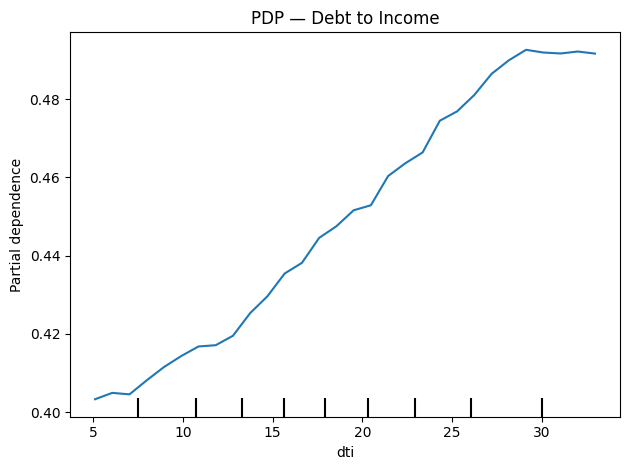

In [3]:
from src.global_interpretability import plot_pdp_1d, plot_pdp_2d
# single-feature PDP plot

plot_pdp_1d(model, df, "dti", title="PDP — Debt to Income")

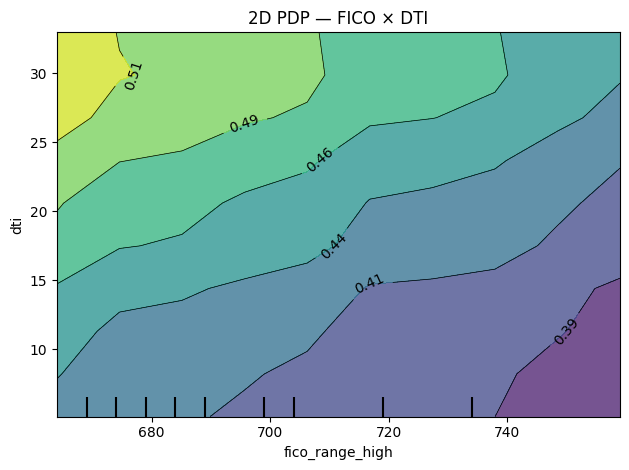

In [4]:
# 2-feature PDP plot
plot_pdp_2d(model, df, ("fico_range_high", "dti"), title="2D PDP — FICO × DTI")

### ICE

In [ ]:
from src.local_interpretability import plot_ice, plot_ice_subsampled
plot_ice(model, df, "dti", centered=True, title="cICE — Debt To Income")

plot_ice_subsampled(
    model, df, "dti",
    subsample=200, centered=True,
    title="cICE — Debt To Income (subsampled)"
)

/Users/babou/HEC/Interpretability, Stability, and Algorithmic Fairness/Interpretability-Stability-and-Fairness-project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### LIME

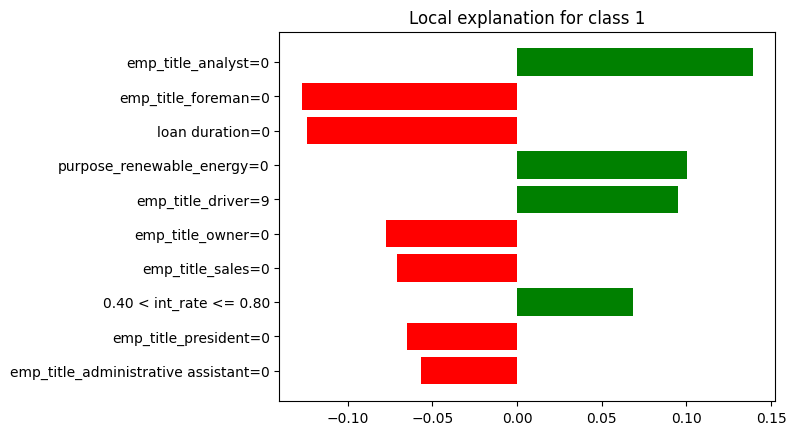

In [ ]:
from src.local_interpretability import lime_interpretation, lime_interpreter

instance = df.sample(n=1, random_state=42)
instance = instance.iloc[0]
lime_explainer = lime_interpreter(df)
lime_interpretation(lime_explainer, model, instance, show=True, filename=None)

### SHAP

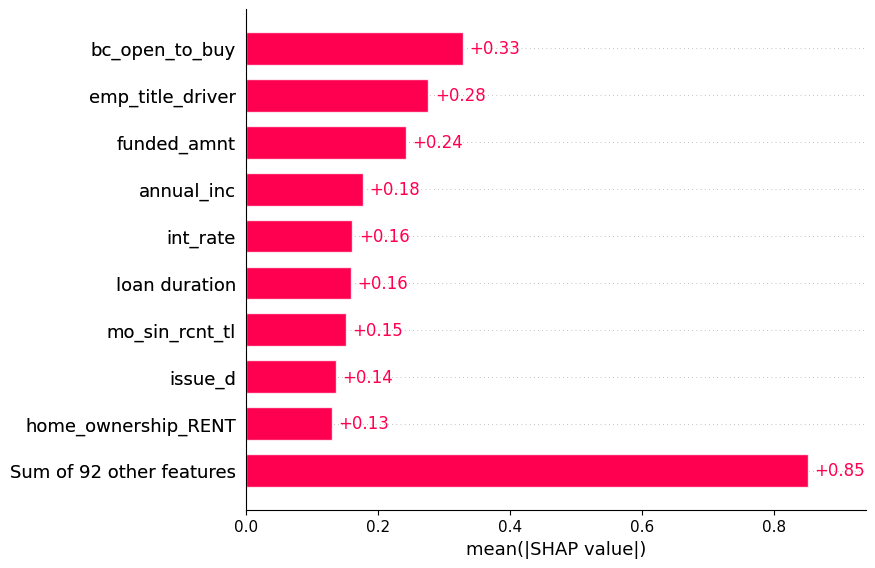

In [ ]:
from src.local_interpretability import shap_interpretation, shap_plot

# instance is a single random row from the dataframe
instance = df.sample(n=1, random_state=42)
shap_values = shap_interpretation(model, df, instance)
shap_plot(shap_values, plot_type="bar")

### PI

Processed feature 0/101: issue_d, Importance: -0.0169445135761066
Processed feature 1/101: annual_inc, Importance: -0.009129679118588085
Processed feature 2/101: avg_cur_bal, Importance: -0.006727921969568507


/Users/gustavetriomphe/Desktop/HEC/Interpretability-Stability-and-Fairness-project/src/performance_interpretability.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


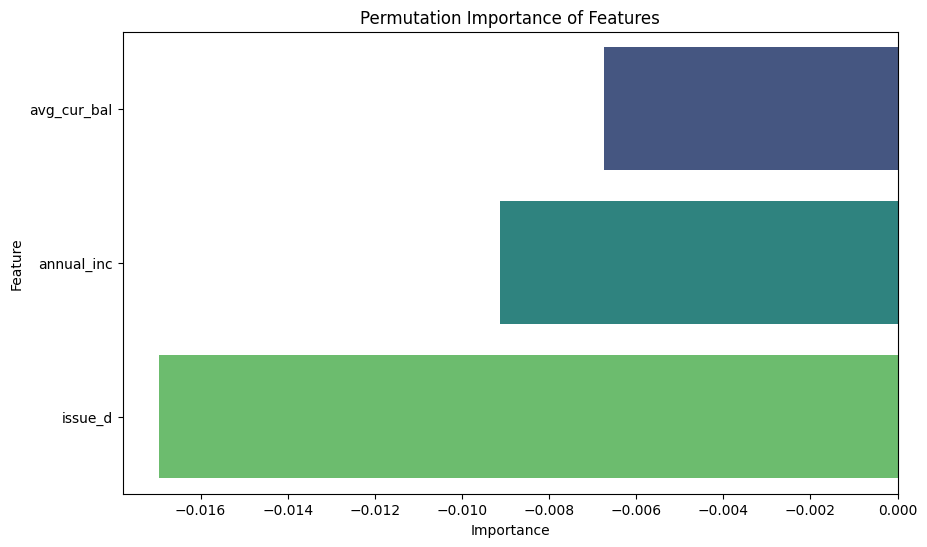

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

from src.performance_interpretability import PI_plot

pm = roc_auc_score
y_true = true_labels
features = df.columns.tolist()
PI_plot(df, model, features, pm, y_true)